# Introduction to Portfolio Construction and Analysis with Python
## Week 1
### Fundamentals of risk and returns
#### Fundamentals of Returns

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

#You can also use plotly backend on Pandas to get some prettier charts. The standard option is 'matplotlib'.
#pd.options.plotting.backend = "plotly"

In [2]:
prices = []
stocks = ["BOVA11", "ABEV3", "AZUL4", "BBAS3", "CVCB3", "JBSS3", "OIBR3", "SMAL11", "SMLS3",] #"VIVA3"]
for f in stocks:
    data = pd.read_csv("./br_stocks/{}.csv".format(f)).dropna()[["date", "close"]]
    prices.append(data)
prices = reduce(lambda x, y: pd.merge(x, y, on='date'), prices)

prices['date'] = pd.to_datetime(prices["date"])
prices = prices.set_index("date").round(2)
prices.columns = stocks
prices

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2017-04-11,62.42,17.62,22.40,32.82,28.60,10.45,2.69,62.68,64.74
2017-04-12,61.68,17.67,22.96,32.28,28.72,10.15,2.69,62.10,63.85
2017-04-13,60.80,17.76,22.99,30.60,29.26,10.20,3.13,62.18,62.58
2017-04-17,62.25,18.06,22.85,32.02,30.45,10.34,3.10,63.20,65.74
2017-04-18,61.95,18.16,23.91,32.33,30.55,10.20,3.28,63.40,65.98
...,...,...,...,...,...,...,...,...,...
2020-06-01,85.47,12.60,15.35,31.80,15.50,21.96,0.80,97.27,13.38
2020-06-02,87.55,12.97,16.75,32.82,18.60,21.81,0.83,101.13,15.01
2020-06-03,89.65,13.25,18.45,34.75,19.82,20.60,0.82,105.77,16.93


In [3]:
prices.index = pd.Index(prices.index + pd.offsets.MonthEnd(0))
prices = prices.loc[~prices.index.duplicated(keep='last')][9:]
prices.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-01-31,82.00,21.95,31.05,39.68,55.13,10.05,2.69,84.20,82.15
2018-02-28,82.50,22.00,33.63,41.80,56.14,9.91,3.02,83.65,84.28
2018-03-31,82.43,24.07,38.20,41.03,60.65,9.35,2.94,83.75,69.50
2018-04-30,83.18,23.33,36.40,36.70,57.99,8.75,2.89,85.57,72.00
2018-05-31,74.07,19.69,26.51,30.37,51.00,8.93,2.63,76.00,58.27


In [4]:
returns = prices.pct_change().dropna()
returns.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.006098,0.002278,0.083092,0.053427,0.018320,-0.013930,0.122677,-0.006532,0.025928
2018-03-31,-0.000848,0.094091,0.135891,-0.018421,0.080335,-0.056509,-0.026490,0.001195,-0.175368
2018-04-30,0.009099,-0.030744,-0.047120,-0.105533,-0.043858,-0.064171,-0.017007,0.021731,0.035971
2018-05-31,-0.109522,-0.156022,-0.271703,-0.172480,-0.120538,0.020571,-0.089965,-0.111838,-0.190694
2018-06-30,-0.050223,-0.086846,-0.195398,-0.056635,-0.113725,0.041433,-0.007605,-0.036842,-0.107603


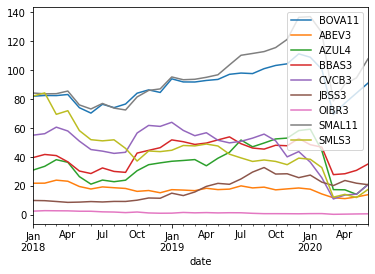

In [5]:
prices.plot()

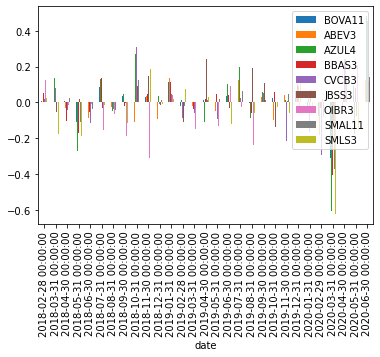

In [6]:
returns.plot.bar()

In [7]:
returns.std(ddof=1)

BOVA11    0.081173
ABEV3     0.090688
AZUL4     0.194228
BBAS3     0.136568
CVCB3     0.182322
JBSS3     0.121162
OIBR3     0.183235
SMAL11    0.096504
SMLS3     0.174807
dtype: float64

In [8]:
returns.mean()

BOVA11    0.007227
ABEV3    -0.011191
AZUL4     0.009246
BBAS3     0.005212
CVCB3    -0.014058
JBSS3     0.032394
OIBR3    -0.021281
SMAL11    0.013859
SMLS3    -0.032844
dtype: float64

In [9]:
((returns+1).prod()-1)

BOVA11    0.110366
ABEV3    -0.359909
AZUL4    -0.318519
BBAS3    -0.112903
CVCB3    -0.620715
JBSS3     1.084577
OIBR3    -0.687732
SMAL11    0.280166
SMLS3    -0.785271
dtype: float64

#### Measures of Risk and Reward

In [10]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BOVA11    0.079761
ABEV3     0.089111
AZUL4     0.190850
BBAS3     0.134193
CVCB3     0.179151
JBSS3     0.119055
OIBR3     0.180048
SMAL11    0.094826
SMLS3     0.171767
dtype: float64

In [11]:
variance = squared_deviations.sum() / (returns.shape[0] - 1)
volatility = variance**0.5
volatility

BOVA11    0.081173
ABEV3     0.090688
AZUL4     0.194228
BBAS3     0.136568
CVCB3     0.182322
JBSS3     0.121162
OIBR3     0.183235
SMAL11    0.096504
SMLS3     0.174807
dtype: float64

In [12]:
returns.std()*np.sqrt(12)

BOVA11    0.281191
ABEV3     0.314153
AZUL4     0.672827
BBAS3     0.473086
CVCB3     0.631582
JBSS3     0.419719
OIBR3     0.634745
SMAL11    0.334301
SMLS3     0.605549
dtype: float64

In [13]:
data = pd.read_csv("./data/Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0,
    parse_dates=True, na_values=-99.99)

In [14]:
data

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [15]:
columns = ["Lo 10", "Hi 10"]
portf = data[columns]
portf.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [16]:
portf = portf/100

In [17]:
portf.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [18]:
portf.columns = ["SmallCap", "LargeCap"]
portf.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


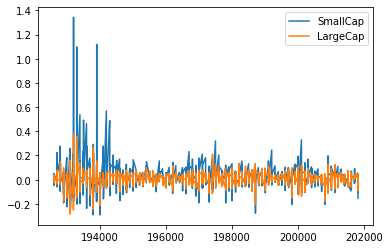

In [19]:
portf.plot.line()

In [20]:
portf.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [21]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

BOVA11    0.281191
ABEV3     0.314153
AZUL4     0.672827
BBAS3     0.473086
CVCB3     0.631582
JBSS3     0.419719
OIBR3     0.634745
SMAL11    0.334301
SMLS3     0.605549
dtype: float64

In [22]:
n_months=len(returns)
returns_per_month = (returns+1).prod()**(1/n_months) -1
returns_per_month

BOVA11    0.003617
ABEV3    -0.015267
AZUL4    -0.013137
BBAS3    -0.004123
CVCB3    -0.032877
JBSS3     0.025653
OIBR3    -0.039340
SMAL11    0.008553
SMLS3    -0.051665
dtype: float64

In [23]:
annualized_return = (returns_per_month + 1)**12 - 1
annualized_return

BOVA11    0.044272
ABEV3    -0.168573
AZUL4    -0.146734
BBAS3    -0.048364
CVCB3    -0.330456
JBSS3     0.355213
OIBR3    -0.382213
SMAL11    0.107608
SMLS3    -0.470896
dtype: float64

In [24]:
return_risk_ratio = annualized_return/annualized_vol

In [25]:
riskfree_rate = 0.03

In [26]:
excess_return = (annualized_return - riskfree_rate)
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

BOVA11    0.050755
ABEV3    -0.632090
AZUL4    -0.262674
BBAS3    -0.165645
CVCB3    -0.570719
JBSS3     0.774834
OIBR3    -0.649415
SMAL11    0.232150
SMLS3    -0.827176
dtype: float64

#### Measuring Max Drawdown

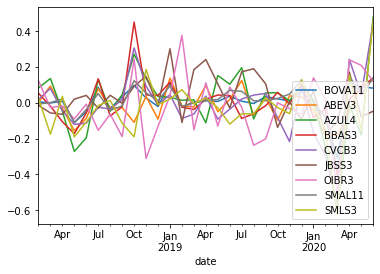

In [27]:
returns.plot.line()

In [28]:
#returns.index = returns.index.to_period('M')
returns.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.006098,0.002278,0.083092,0.053427,0.018320,-0.013930,0.122677,-0.006532,0.025928
2018-03-31,-0.000848,0.094091,0.135891,-0.018421,0.080335,-0.056509,-0.026490,0.001195,-0.175368
2018-04-30,0.009099,-0.030744,-0.047120,-0.105533,-0.043858,-0.064171,-0.017007,0.021731,0.035971
2018-05-31,-0.109522,-0.156022,-0.271703,-0.172480,-0.120538,0.020571,-0.089965,-0.111838,-0.190694
2018-06-30,-0.050223,-0.086846,-0.195398,-0.056635,-0.113725,0.041433,-0.007605,-0.036842,-0.107603


<b> Compute drawdowns </b>:
- compute a wealth index;
- compute previous peaks;
- compute drawndown - wich is the wealth value as a percentage of the previous peak

In [29]:
wealth_index = 1000*(1+returns).cumprod()

In [30]:
wealth_index.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,1006.097561,1002.277904,1083.091787,1053.427419,1018.320334,986.069652,1122.676580,993.467933,1025.928180
2018-03-31,1005.243902,1096.583144,1230.273752,1034.022177,1100.126973,930.348259,1092.936803,994.655582,846.013390
2018-04-30,1014.390244,1062.870159,1172.302738,924.899194,1051.877381,870.646766,1074.349442,1016.270784,876.445526
2018-05-31,903.292683,897.038724,853.784219,765.372984,925.086160,888.557214,977.695167,902.612827,709.312234
2018-06-30,857.926829,819.134396,686.956522,722.026210,819.880283,925.373134,970.260223,869.358670,632.988436


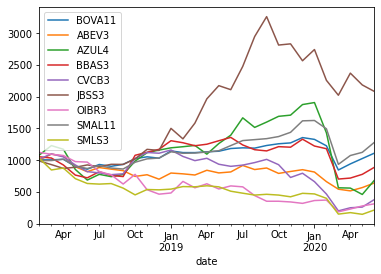

In [31]:
wealth_index.plot.line()

In [32]:
previous_peaks = wealth_index.cummax()

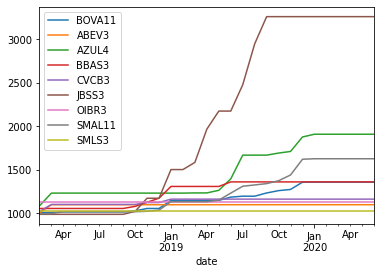

In [33]:
previous_peaks.plot.line()

In [34]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

In [35]:
drawdown.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-31,-0.000848,0.000000,0.000000,-0.018421,0.000000,-0.056509,-0.026490,0.000000,-0.175368
2018-04-30,0.000000,-0.030744,-0.047120,-0.122010,-0.043858,-0.117053,-0.043046,0.000000,-0.145705
2018-05-31,-0.109522,-0.181969,-0.306021,-0.273445,-0.159110,-0.098890,-0.129139,-0.111838,-0.308614
2018-06-30,-0.154244,-0.253012,-0.441623,-0.314593,-0.254740,-0.061554,-0.135762,-0.144560,-0.383009


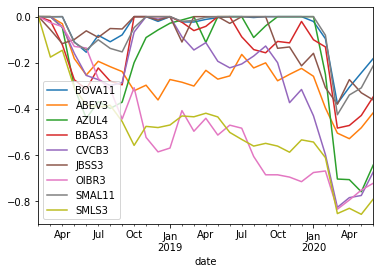

In [36]:
drawdown.plot.line()

In [37]:
drawdown.mean()

BOVA11   -0.063583
ABEV3    -0.263298
AZUL4    -0.193998
BBAS3    -0.146334
CVCB3    -0.263126
JBSS3    -0.102603
OIBR3    -0.482530
SMAL11   -0.072435
SMLS3    -0.491637
dtype: float64

In [38]:
drawdown.idxmin()

BOVA11   2020-03-31
ABEV3    2020-04-30
AZUL4    2020-05-31
BBAS3    2020-03-31
CVCB3    2020-03-31
JBSS3    2020-03-31
OIBR3    2020-03-31
SMAL11   2020-03-31
SMLS3    2020-05-31
dtype: datetime64[ns]

### Beyond the Gaussian case: Extreme risk estimates

#### Deviations from normality

#### Downside risk measures

In [39]:
def get_hfi_returns():
    hfi = pd.read_csv("./data/edhec-hedgefundindices.csv", header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period("M")
    return hfi

def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 3).mean()
    return exp/sigma_r**3

def kurtosis(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 4).mean()
    return exp/sigma_r**4

In [40]:
hfi = get_hfi_returns()

In [41]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [42]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [43]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [44]:
from scipy import stats

In [45]:
stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [46]:
normal_rets = np.random.normal(0, .15, size=(26300, 1))

In [47]:
stats.skew(normal_rets)

array([-0.00444172])

In [48]:
kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [49]:
stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [50]:
stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=1.6362189257576043, pvalue=0.44126509447455775)

In [51]:
s, p = stats.jarque_bera(hfi)
p > .01

False

In [52]:
s, p = stats.jarque_bera(normal_rets)
p > .01

True

In [53]:
def is_normal(df, conf = .01):
    s, p = stats.jarque_bera(df)
    return p > conf

In [54]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool